# Métodos de detección de comunidades

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
SEMILLA_ALEATORIEDAD = 123
np.random.seed(SEMILLA_ALEATORIEDAD)

In [3]:
karate_graph = nx.karate_club_graph()

In [4]:
df_congress = pd.read_csv('congress_network\congress.csv', delimiter=';')
congress_graph = nx.DiGraph()
for index, row in df_congress.iterrows():
    congress_graph.add_edge(row['Source'], row['Target'], weight=row['Weight'])

print("Nodos: ", congress_graph.number_of_nodes())
print("Aristas con pesos: ", congress_graph.number_of_edges())

Nodos:  475
Aristas con pesos:  13289


In [10]:
nx.is_directed(karate_graph)

False

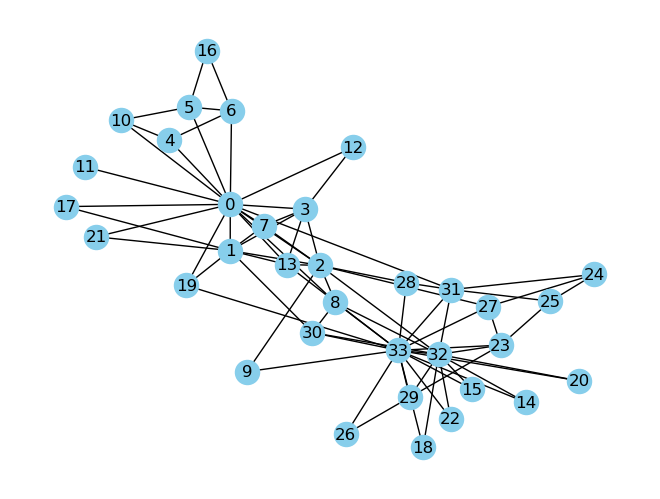

In [75]:
pos = nx.spring_layout(karate_graph)
nx.draw(karate_graph, with_labels = True, pos = pos, node_color='skyblue')
plt.savefig('karate.png')

In [85]:
degree_centrality = nx.degree_centrality(karate_graph)
degree_centrality

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

In [91]:
degree_centrality = nx.degree_centrality(karate_graph)
np.array(list(degree_centrality.values()))

array([0.48484848, 0.27272727, 0.3030303 , 0.18181818, 0.09090909,
       0.12121212, 0.12121212, 0.12121212, 0.15151515, 0.06060606,
       0.09090909, 0.03030303, 0.06060606, 0.15151515, 0.06060606,
       0.06060606, 0.06060606, 0.06060606, 0.06060606, 0.09090909,
       0.06060606, 0.06060606, 0.06060606, 0.15151515, 0.09090909,
       0.09090909, 0.06060606, 0.12121212, 0.09090909, 0.12121212,
       0.12121212, 0.18181818, 0.36363636, 0.51515152])

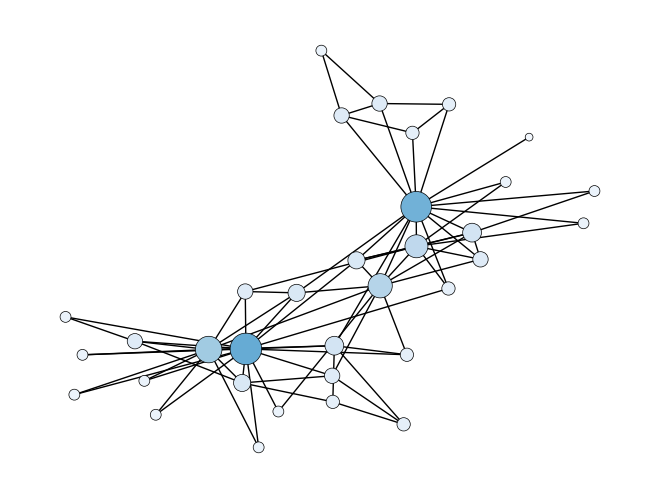

In [102]:
import matplotlib as mpl

# Posición de los nodos
pos = nx.spring_layout(karate_graph)

# Mapa de colores
cmap =  mpl.colormaps['Blues']

degree_centrality = nx.degree_centrality(karate_graph)
degree_centrality = np.array(list(degree_centrality.values()))

node_size = 1000 * degree_centrality +1
node_color = cmap(degree_centrality)
nx.draw(
    karate_graph,
    pos=pos,
    node_size=node_size,
    node_color=node_color,
    linewidths=0.5,
    edgecolors='black'
)


# Método de Louvain
con https://cienciadedatos.net/documentos/pygml03-analisis-redes-python-networkx

In [77]:
# Louvain Algorithm
communities = nx_comm.louvain_communities(karate_graph, weight='weight ', resolution=0.5)
communities

[{0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21},
 {8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]

In [78]:
communities_map = {}
for i in range(len(communities)):
    communities_map.update(dict.fromkeys(communities[i], i))

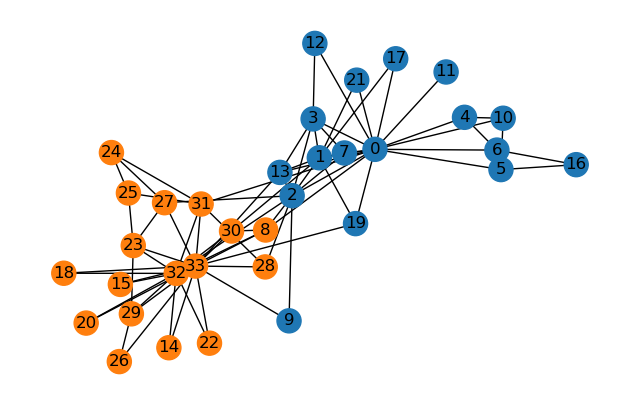

In [113]:
# Gráfico de la red coloreado por comunidades
color_pallet = list(mcolors.TABLEAU_COLORS.values())
node_colors = []
for node in karate_graph:
    node_colors.append(color_pallet[communities_map[node]])

fig, ax = plt.subplots(figsize=(8, 5))
nx.draw(karate_graph, node_color=node_colors, with_labels=True)
plt.savefig('karateLouvain.png')
plt.show()

In [63]:
comunidades2 = nx.algorithms.community.louvain_communities(congress_graph, weight='Weight', seed=SEMILLA_ALEATORIEDAD)
len(comunidades2)

5

In [64]:
for comunidad in comunidades2:
    print(len(comunidad))

43
21
56
186
169


In [57]:
comunidades = nx.algorithms.community.louvain_communities(congress_graph, weight='Weight')
len(comunidades)

3

In [62]:
for comunidad in comunidades:
    print(len(comunidad))

94
205
176


In [59]:
communities_map = {}
for i in range(len(comunidades)):
    communities_map.update(dict.fromkeys(comunidades[i], i))

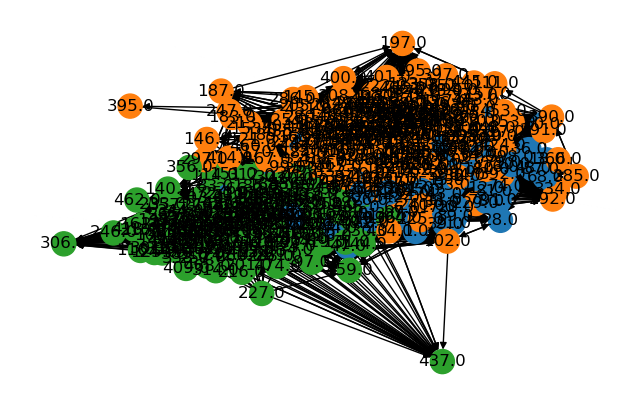

In [60]:
color_pallet = list(mcolors.TABLEAU_COLORS.values())
node_colors = []
for node in congress_graph:
    node_colors.append(color_pallet[communities_map[node]])

fig, ax = plt.subplots(figsize=(8, 5))
nx.draw(congress_graph, node_color=node_colors)
plt.show()

# Método de Girvan-Newman

## Karate club

In [16]:
# Algoritmo Girvan-Newman
communities_generator = nx_comm.girvan_newman(karate_graph, most_valuable_edge=None)

In [17]:
# Comunidades tras la primera iteración del algoritmo
communities = next(communities_generator)
communities

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})

In [18]:
# Comunidades tras las 3 primeras iteraciones del algoritmo
communities_generator = nx_comm.girvan_newman(karate_graph, most_valuable_edge=None)
for communities in itertools.islice(communities_generator, 3):
    print(communities)

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})
({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9})
({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9})


In [19]:
# Acceder a las comunidades generadas en una determinada iteración
iteracion = 0
communities_generator = nx_comm.girvan_newman(karate_graph, most_valuable_edge=None)
communities = next(itertools.islice(communities_generator, iteracion, None))
communities

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})

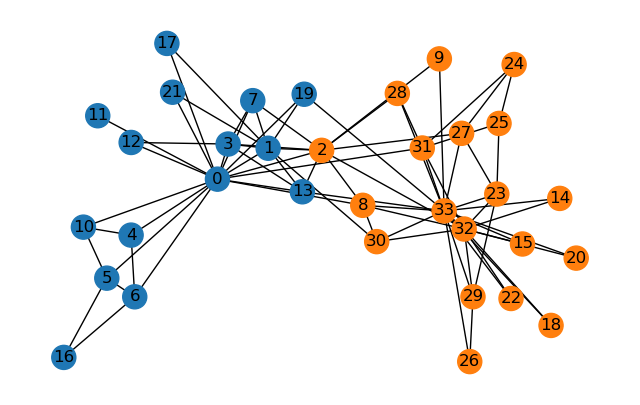

In [107]:
# Gráfico de la red coloreado por comunidades tras 1 iteraciones del algoritmo
communities_generator = nx_comm.girvan_newman(karate_graph, most_valuable_edge=None)
communities = next(itertools.islice(communities_generator, 0, None))

color_pallet = list(mcolors.TABLEAU_COLORS.values())
node_colors = []
for node in karate_graph:
    if node in communities[0]:
        node_colors.append(color_pallet[0])
    elif node in communities[1]:
        node_colors.append(color_pallet[1])
    else:
        node_colors.append(color_pallet[2])

fig, ax = plt.subplots(figsize=(8, 5))
nx.draw(karate_graph, node_color=node_colors, with_labels=True, ax=ax)
plt.savefig('karateGN.png')
plt.show()

# Louvain para Facebook

In [30]:
df_facebook = pd.read_csv('ego-facebook\\facebook.csv', delimiter = ';')
df_facebook

,Source,Target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [33]:
facebook_graph = nx.Graph()
for index, row in df_facebook.iterrows():
    facebook_graph.add_edge(row['Source'], row['Target'])

print("Nodos: ", facebook_graph.number_of_nodes())
print("Aristas con pesos: ", facebook_graph.number_of_edges())

Nodos:  4039
Aristas con pesos:  88234


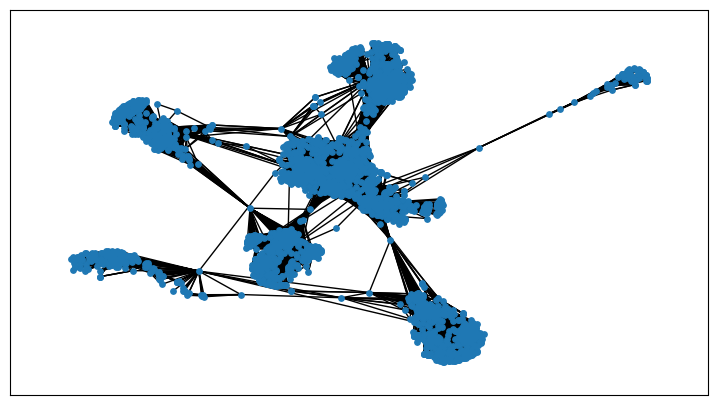

In [37]:
fig, ax = plt.subplots(figsize=(9, 5))
spring_pos = nx.spring_layout(facebook_graph)
nx.draw_networkx(
    G           = facebook_graph,
    pos         = spring_pos,
    with_labels = False,
    node_size   = 15,
    ax          = ax
)

In [39]:
# Deteción de comunidades con Louvain
comunidades = nx_comm.louvain_communities(
                G          = facebook_graph,
                weight     = 'weight',
                resolution = 0.2
             )
print(f"Número de comunidades detectadas: {len(comunidades)}")
print(f"Tamaño de las comunidades detectadas: {[len(comunidad) for comunidad in comunidades]}")

Número de comunidades detectadas: 9
Tamaño de las comunidades detectadas: [341, 579, 764, 206, 788, 515, 237, 548, 61]


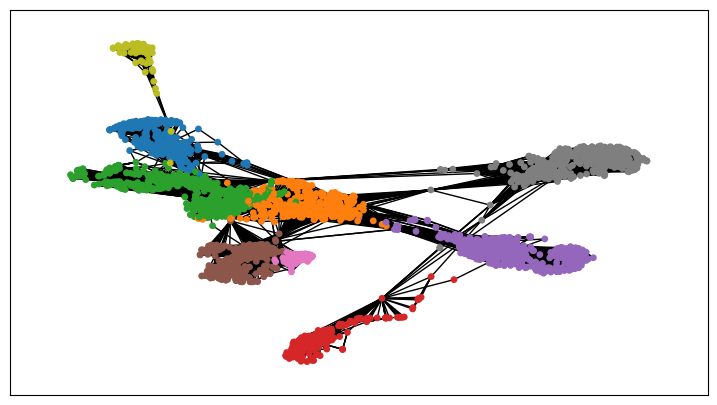

In [40]:
# Colorear los nodos en función de la comunidad
color_pallet = list(mcolors.TABLEAU_COLORS.values())

comunidades_map = {}
for i in range(len(comunidades)):
    comunidades_map.update(dict.fromkeys(comunidades[i], i))

comunidades_map

color_nodos = []
for node in facebook_graph:
    color_nodos.append(color_pallet[comunidades_map[node]])

fig, ax = plt.subplots(figsize=(9, 5))
spring_pos = nx.spring_layout(facebook_graph)
nx.draw_networkx(
    G           = facebook_graph,
    pos         = spring_pos,
    with_labels = False,
    node_size   = 15,
    node_color  = color_nodos,
    ax          = ax
)